In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import cross_val_predict
from tqdm import tqdm

import utils

In [2]:
RANDOM_SEED = 42

In [3]:
(x_train, y_train), (x_test, y_test) = utils.load_mnist_5()
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (60000, 784), y_train.shape = (60000,)
x_test.shape = (10000, 784), y_test.shape = (10000,)


In [4]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [5]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
print(f"y_train_pred.shape = {y_train_pred.shape}")
confusion_matrix(y_train, y_train_pred)

y_train_pred.shape = (60000,)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [6]:
true_negative = np.sum((y_train == False) & (y_train_pred == False))
print(f"true_negative = {true_negative}")

false_positive = np.sum((y_train == False) & (y_train_pred == True))
print(f"false_positive = {false_positive}")

false_negative = np.sum((y_train == True) & (y_train_pred == False))
print(f"false_negative = {false_negative}")

true_positive = np.sum((y_train == True) & (y_train_pred == True))
print(f"true_positive = {true_positive}")

true_negative = 53892
false_positive = 687
false_negative = 1891
true_positive = 3530


In [7]:
y_train_perfect_pred = y_train
confusion_matrix(y_train, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [8]:
precision_score(y_train, y_train_pred)

0.8370879772350012

In [9]:
precision = true_positive / (true_positive + false_positive)
print(f"precision = {precision}")

precision = 0.8370879772350012


In [10]:
recall_score(y_train, y_train_pred)

0.6511713705958311

In [11]:
recall = true_positive / (true_positive + false_negative)
print(f"recall = {recall}")

recall = 0.6511713705958311


In [12]:
f1_score(y_train, y_train_pred)

0.7325171197343846

In [13]:
f1 = 2 / (1 / precision + 1 / recall)
print(f"f1 = {f1}")

f1 = 0.7325171197343847


In [14]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [15]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure()
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.show()

precisions.shape = (59967,)
recalls.shape = (59967,)
thresholds.shape = (59966,)


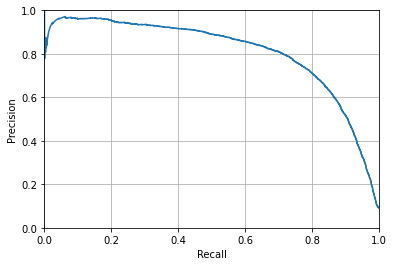

In [16]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
print(f"precisions.shape = {precisions.shape}")
print(f"recalls.shape = {recalls.shape}")
print(f"thresholds.shape = {thresholds.shape}")

plot_precision_vs_recall(precisions, recalls)

100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:54<00:00, 1105.82it/s]


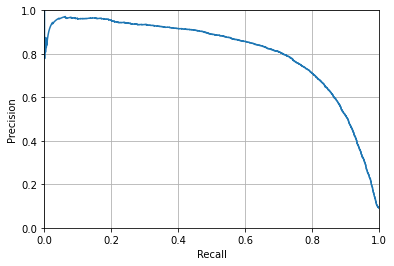

In [17]:
y_score_sorted = np.sort(y_scores)
precisions = np.zeros(len(y_scores))
recalls = np.zeros(len(y_scores))
for i, score in enumerate(tqdm(y_score_sorted)):
    y_preds = y_scores >= score
    true_positive = np.sum((y_train == True) & (y_preds == True))
    true_negative = np.sum((y_train == False) & (y_preds == False))
    false_positive = np.sum((y_train == False) & (y_preds == True))
    false_negative = np.sum((y_train == True) & (y_preds == False))
    precisions[i] = true_positive / (true_positive + false_positive)
    recalls[i] = true_positive / (true_positive + false_negative)
    
plot_precision_vs_recall(precisions, recalls)